<a href="https://colab.research.google.com/github/aman-242002/PRODIGY_WD_-01/blob/main/intershipnewdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Load the dataset
data = pd.read_csv('Climatedata.csv')
display(data)

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [ ]:
# Data exploration
print(data.head())
print(data.describe())
print(data.isnull().sum())

   N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
0      90      42      43    20.879744  82.002744  6.502985  202.935536   
1      85      58      41    21.770462  80.319644  7.038096  226.655537   
2      60      55      44    23.004459  82.320763  7.840207  263.964248   
3      74      35      40    26.491096  80.158363  6.980401  242.864034   
4      78      42      42    20.130175  81.604873  7.628473  262.717340   

                 STATE  CROP_PRICE  CROP  
0  Andaman and Nicobar        7000  Rice  
1  Andaman and Nicobar        5000  Rice  
2  Andaman and Nicobar        7000  Rice  
3  Andaman and Nicobar        7000  Rice  
4  Andaman and Nicobar      120000  Rice  
            N_SOIL       P_SOIL       K_SOIL  TEMPERATURE     HUMIDITY  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.26381

Index(['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph',
       'RAINFALL', 'STATE', 'CROP_PRICE', 'CROP'],
      dtype='object')


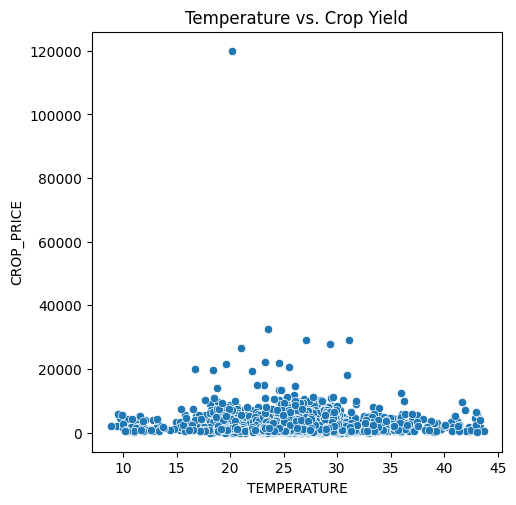

In [ ]:
# Verify the column names
print(data.columns)

plt.figure(figsize=(18, 12))

# Temperature vs. Crop Yield
plt.subplot(2, 3, 1)
sns.scatterplot(x='TEMPERATURE', y='CROP_PRICE', data=data)
plt.title('Temperature vs. Crop Yield')

plt.show()


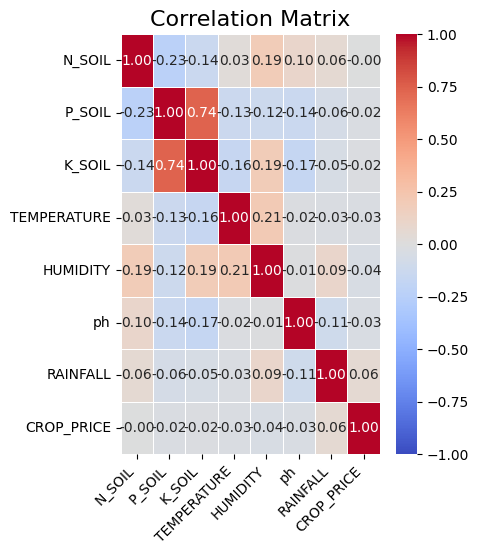

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 4)
# Create a DataFrame with only numeric columns
data_numeric = data.select_dtypes(include=[np.number])
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10}, fmt=".2f", linewidths=.5)  # Format numbers and add lines between cells
plt.title('Correlation Matrix', fontsize=16)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

In [ ]:
# Handle missing values if any (example: fill with mean)
numeric_columns = data.select_dtypes(include=[float, int]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Check for any remaining missing values
print("Remaining missing values after filling:", data.isnull().sum())

# Define features and target variable
try:
    X = data[['TEMPERATURE', 'RAINFALL']]
    y = data['CROP_PRICE']
except KeyError as e:
    print(f"KeyError: {e}. Please check if the column names are correct.")

# Split the data into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Train and test split completed.")
except ValueError as e:
    print(f"ValueError: {e}. Check if X and y have the same number of rows.")

Remaining missing values after filling: N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64
Train and test split completed.


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 8135516.22
R^2 Score: -0.19


In [ ]:
# Predict crop yield for new data
new_data = pd.DataFrame({
    'TEMPERATURE': [25.0, 30.0],
    'RAINFALL': [100.0, 150.0]
})

yield_predictions = best_model.predict(new_data)
print(yield_predictions)


[2975.26943974 2520.00630598]


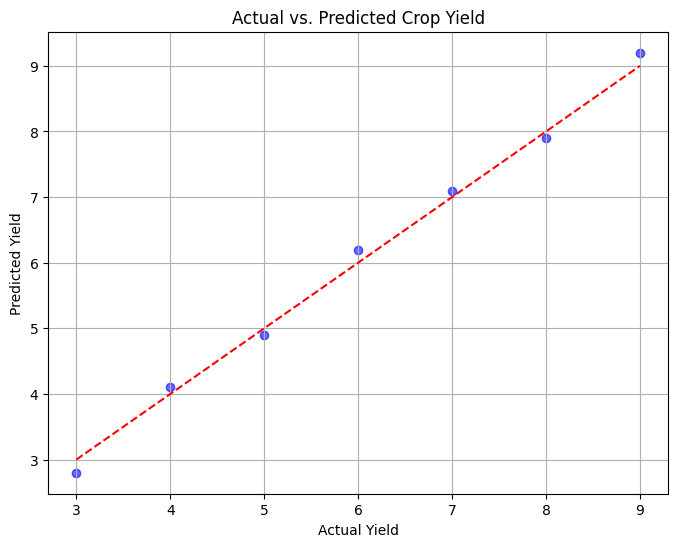

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Crop Yield')
plt.grid()
plt.show()
